# Multiple Linear Regression

# Import libraries

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Import data

In [22]:
# Get dataset
#df_start = pd.read_csv('C:/Users/hassan/Desktop/EDA - ML - DS7/50_Startups.csv')

# Generate a synthetic dataset
np.random.seed(0)
n_samples = 500
X1 = np.random.rand(n_samples) * 100  # Feature 1: R&D Spend
X2 = np.random.rand(n_samples) * 100  # Feature 2: Administration
X3 = np.random.rand(n_samples) * 100  # Feature 3: Marketing Spend
X4 = np.random.choice(['New York', 'California', 'Florida'], n_samples)  # Feature 4: State
y = 5 * X1 + 3 * X2 + 4 * X3 + np.random.randn(n_samples) * 100  # Target variable: Profit

# Create a DataFrame
df_start = pd.DataFrame({'R&D Spend': X1, 'Administration': X2, 'Marketing Spend': X3, 'State': X4, 'Profit': y})

df_start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,54.881350,31.038083,59.288027,California,681.550173
1,71.518937,37.303486,1.006370,California,431.397862
2,60.276338,52.497044,47.582620,New York,602.272225
3,54.488318,75.059502,70.877039,Florida,868.697823
4,42.365480,33.350747,4.397543,Florida,192.953524


In [23]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        500 non-null    float64
 1   Administration   500 non-null    float64
 2   Marketing Spend  500 non-null    float64
 3   State            500 non-null    object 
 4   Profit           500 non-null    float64
dtypes: float64(4), object(1)
memory usage: 19.7+ KB


# Analyze data

## Describe

In [24]:
# Describe data
df_start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,500.000000,500.000000,500.000000,500.000000
mean,49.659764,49.524543,51.137825,599.473448
std,29.175642,29.001916,30.193272,229.460475
min,0.469548,0.054596,0.066422,16.949061
25%,24.782590,24.761346,26.442912,431.894750
50%,48.684194,47.972272,51.953567,600.341927
75%,73.074578,73.993732,77.572888,762.739530
max,99.884701,99.980858,99.802279,1236.856504


## Distribution

C:\Users\hassan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


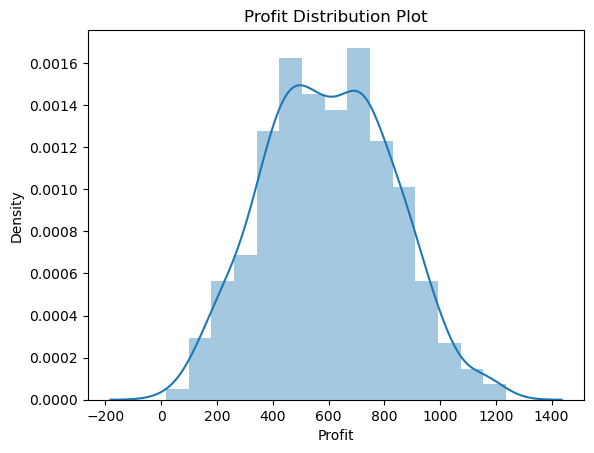

In [25]:
# Data distribution
plt.title('Profit Distribution Plot')
sns.distplot(df_start['Profit'])
plt.show()

## Relationship between Profit and R&D Spend

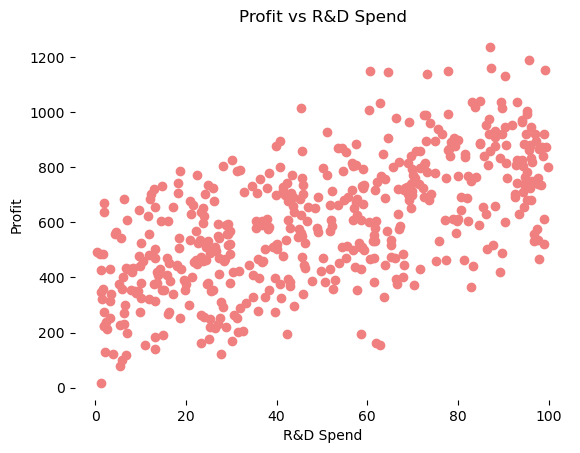

In [26]:
# Relationship between Profit and R&D Spend
plt.scatter(df_start['R&D Spend'], df_start['Profit'], color = 'lightcoral')
plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.box(False)
plt.show()

# Split into Independent/Dependent variables

In [27]:
# Split dataset in dependent/independent variables
X = df_start.iloc[:, :-1].values
y = df_start.iloc[:, -1].values

In [28]:
X

array([[54.88135039273247, 31.03808259798114, 59.28802707811576,
        'California'],
       [71.51893663724195, 37.303486388074745, 1.006369565609333,
        'California'],
       [60.276337607164386, 52.49704422542643, 47.58261958572228,
        'New York'],
       ...,
       [40.17135353795987, 93.84120216943856, 11.224999258738599,
        'Florida'],
       [24.8413465082971, 22.864655098294552, 4.236404709144326,
        'New York'],
       [50.586638382530836, 67.71411441114242, 22.774099334728646,
        'Florida']], dtype=object)

In [29]:
y

array([ 681.55,  431.4 ,  602.27,  868.7 ,  192.95, 1146.71,  637.5 ,
        420.43,  749.81,  777.9 ,  905.3 ,  390.86,  609.03,  701.7 ,
        197.4 ,  349.23,  222.49,  441.87,  993.47,  858.41,  466.53,
        613.75,  435.28,  867.83,  482.64,  757.32,  429.54,  884.15,
        714.7 ,  478.71,  217.21,  462.39,  858.88,  500.45,  222.56,
        533.63,  532.92,  716.78,  805.3 ,  716.08,  277.96,  659.54,
        794.36,  400.01,  719.86,  575.97,  629.25,  721.46,  201.32,
        757.82,  809.42,  297.54,  839.57,  379.1 ,  675.93,  266.21,
        519.28,  489.56,  605.77,  511.7 ,  409.81,  155.91,  800.59,
        410.58,  391.09,  455.34,  604.6 ,  646.19, 1018.29,  477.11,
        760.86,  655.4 ,  740.79,  466.31,  960.36,  122.23,  292.55,
        683.55,  484.89,  557.37,  422.88,  729.9 ,  270.41,  682.32,
        716.32,  495.68,  359.46,  350.28,  806.41, 1037.57,  791.  ,
        631.15,  469.75,  796.84,  219.59,  742.18,  192.93,  669.93,
        750.04,  492

# One-hot encoding

In [30]:
# One-hot encoding of categorical data
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [31]:
X

array([[1.0, 0.0, 0.0, 54.88135039273247, 31.03808259798114,
        59.28802707811576],
       [1.0, 0.0, 0.0, 71.51893663724195, 37.303486388074745,
        1.006369565609333],
       [0.0, 0.0, 1.0, 60.276337607164386, 52.49704422542643,
        47.58261958572228],
       ...,
       [0.0, 1.0, 0.0, 40.17135353795987, 93.84120216943856,
        11.224999258738599],
       [0.0, 0.0, 1.0, 24.8413465082971, 22.864655098294552,
        4.236404709144326],
       [0.0, 1.0, 0.0, 50.586638382530836, 67.71411441114242,
        22.774099334728646]], dtype=object)

# Split into Train/Test sets

In [32]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train model

In [33]:
# Train multiple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predict results

In [34]:
# Predict result
y_pred = regressor.predict(X_test)

# Compare predictions

In [35]:
# Compare predicted result with actual value
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
result

array([[ 538.1 ,  791.  ],
       [ 760.8 ,  602.9 ],
       [ 310.41,  346.87],
       [ 307.34,  408.12],
       [ 713.68,  726.45],
       [ 416.56,  349.23],
       [ 587.5 ,  534.83],
       [ 661.82,  786.19],
       [ 592.35,  609.97],
       [ 473.41,  470.37],
       [ 425.89,  322.08],
       [ 567.26,  603.6 ],
       [ 229.72,  232.38],
       [ 488.69,  445.45],
       [ 303.05,  228.15],
       [ 588.42,  577.39],
       [ 692.39,  764.37],
       [ 599.62,  444.79],
       [ 642.12,  704.19],
       [ 632.12,  716.78],
       [ 197.46,  119.19],
       [ 764.36,  808.49],
       [ 544.11,  504.02],
       [ 462.  ,  464.73],
       [ 493.78,  575.97],
       [ 787.25,  860.11],
       [ 729.8 ,  613.75],
       [ 379.01,  517.52],
       [ 410.61,  192.93],
       [ 232.77,  212.52],
       [ 838.08,  839.33],
       [ 894.17,  933.06],
       [ 749.21,  740.99],
       [ 443.84,  534.07],
       [ 280.52,  255.64],
       [ 648.39,  488.71],
       [ 296.89,  354.4 ],
 

In [37]:
# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 9900.8894528891
R-squared: 0.8070665720988646
